# Import Packages

In [8]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib
import numpy as np
import cv2
import glob
%matplotlib inline

In [12]:
images = glob.glob('../test_images/*.jpg')
images = images[0:3]
print(images)

['../test_images/test3.jpg', '../test_images/straight_lines2.jpg', '../test_images/test1.jpg']


../test_images/test3.jpg
../test_images/straight_lines2.jpg
../test_images/test1.jpg


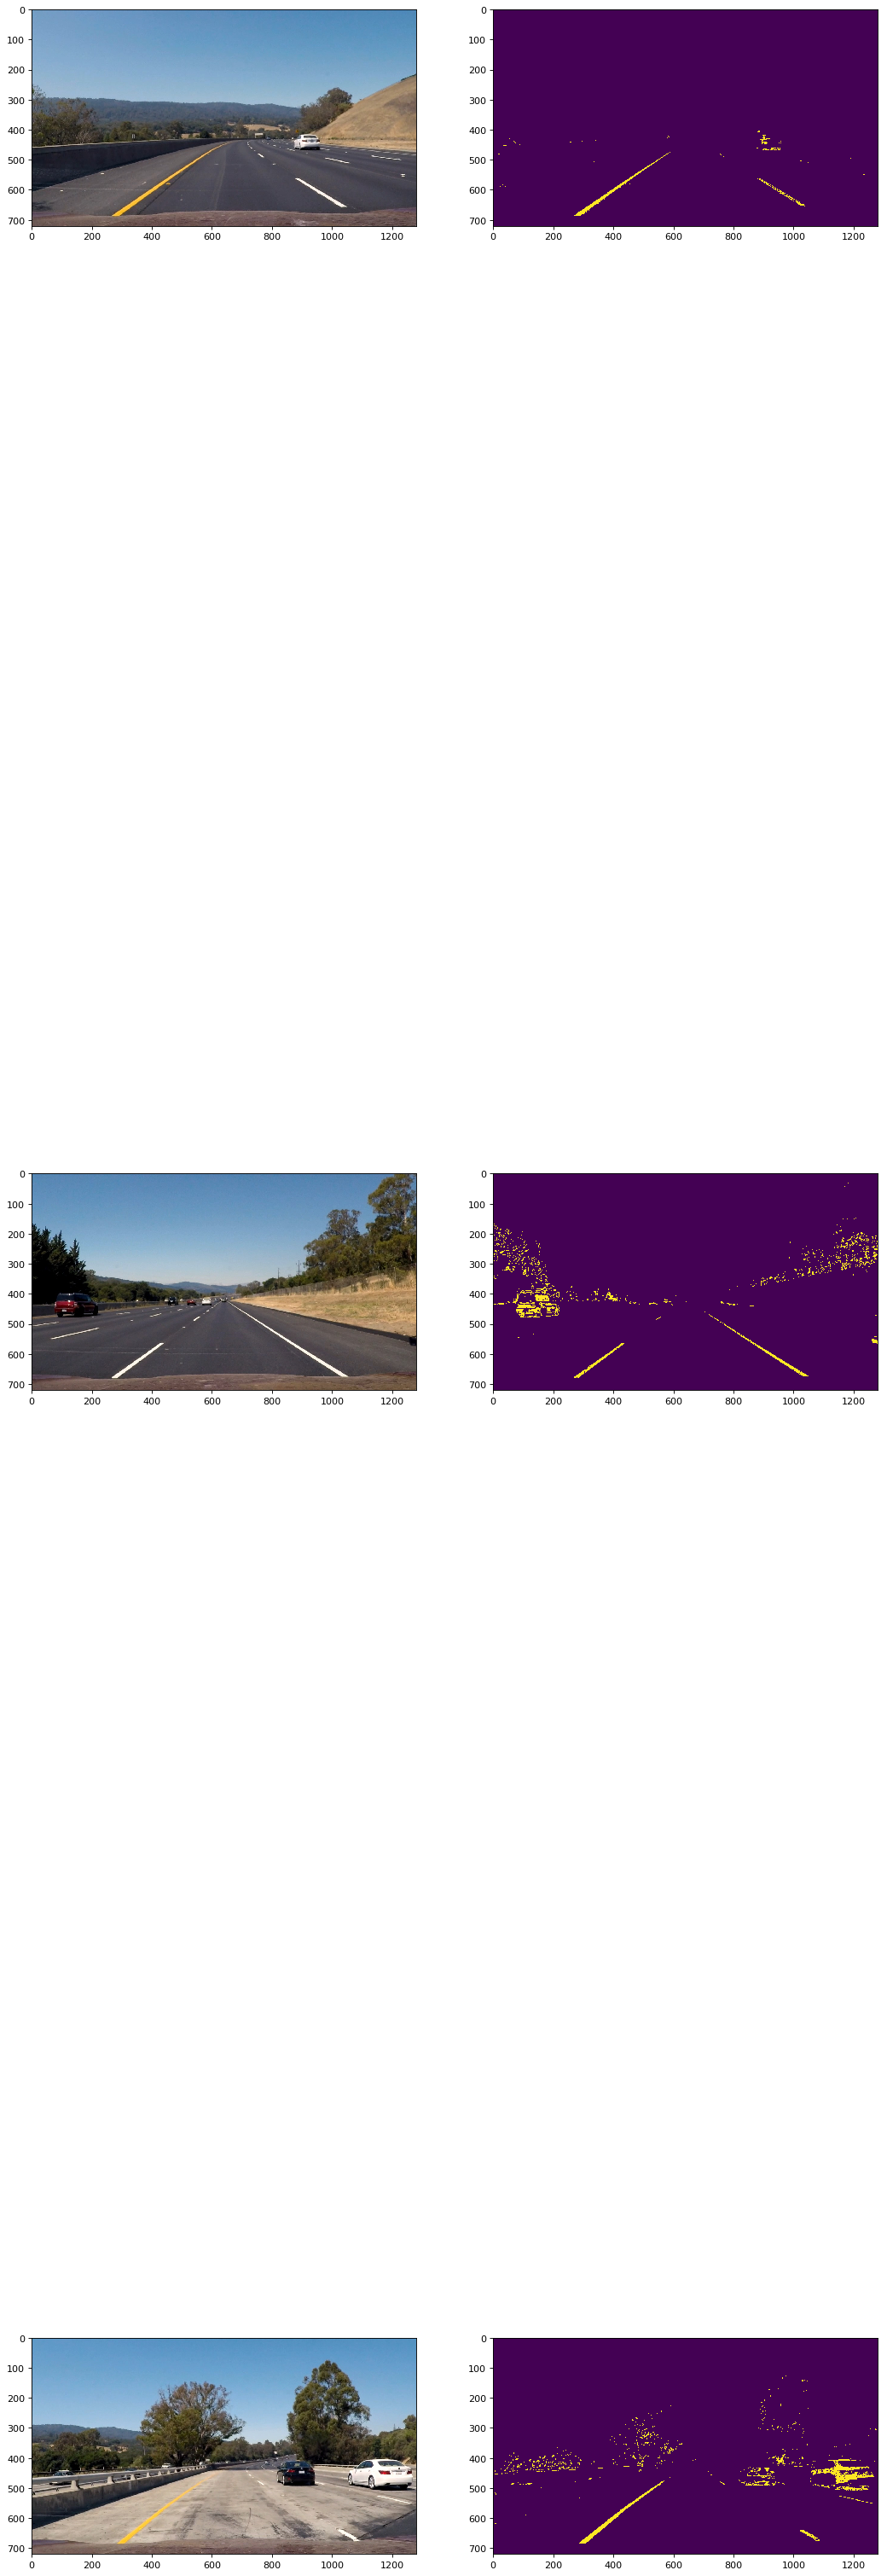

In [26]:
sobel_thresh_min = 20
sobel_thresh_max = 100
sobel_kernel_size = 7

s_thresh_min = 170
s_thresh_max = 255

def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # 3) Calculate the magnitude 
    abs_sobel = np.sqrt(sobel_x **2 + sobel_y ** 2)
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    scaled = np.uint8(255 * abs_sobel / np.max(abs_sobel))
    # 5) Create a binary mask where mag thresholds are met
    binary = np.zeros_like(scaled)
    binary[(mag_thresh[0] <= scaled) & (scaled <= mag_thresh[1])] = 1
    # 6) Return this mask as your binary_output image
    binary_output = binary
    return binary_output

def make_s_thresh(img, thresh=(0, 255)):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    s_channel = hls[:,:,2]

    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= thresh[0]) & (s_channel <= thresh[1])] = 1
    return s_binary
    
def make_binary_image(img):
    
    sobel = mag_thresh(img, sobel_kernel=sobel_kernel_size, mag_thresh=(sobel_thresh_min, sobel_thresh_max))
    s_binary = make_s_thresh(img, thresh=(s_thresh_min, s_thresh_max))
    
    return s_binary

def save_binary_image(binary):
    binary[binary == 1]  =255
    return binary

binary_images = []
plt.figure(figsize=(16, 64),dpi=80)
for i, path in enumerate(images):
    output_dir = "../output_images/binary_images"
    prefix = "".join(path.split("/")[:-2])
    fname = path.split("/")[-1]
    img = mpimg.imread(path)

    result_img = make_binary_image(img)
    binary_images.append(result_img)
    
    cv2.imwrite("{}/{}".format(output_dir, fname), save_binary_image(result_img))
    print(path)
    
    plt.subplot(len(images), 2, 2*i+ 1)
    plt.imshow(img)
    plt.subplot(len(images), 2, 2*i+2)
    plt.imshow(result_img)
    
    
    

../test_images/test3.jpg
../test_images/straight_lines2.jpg
../test_images/test1.jpg


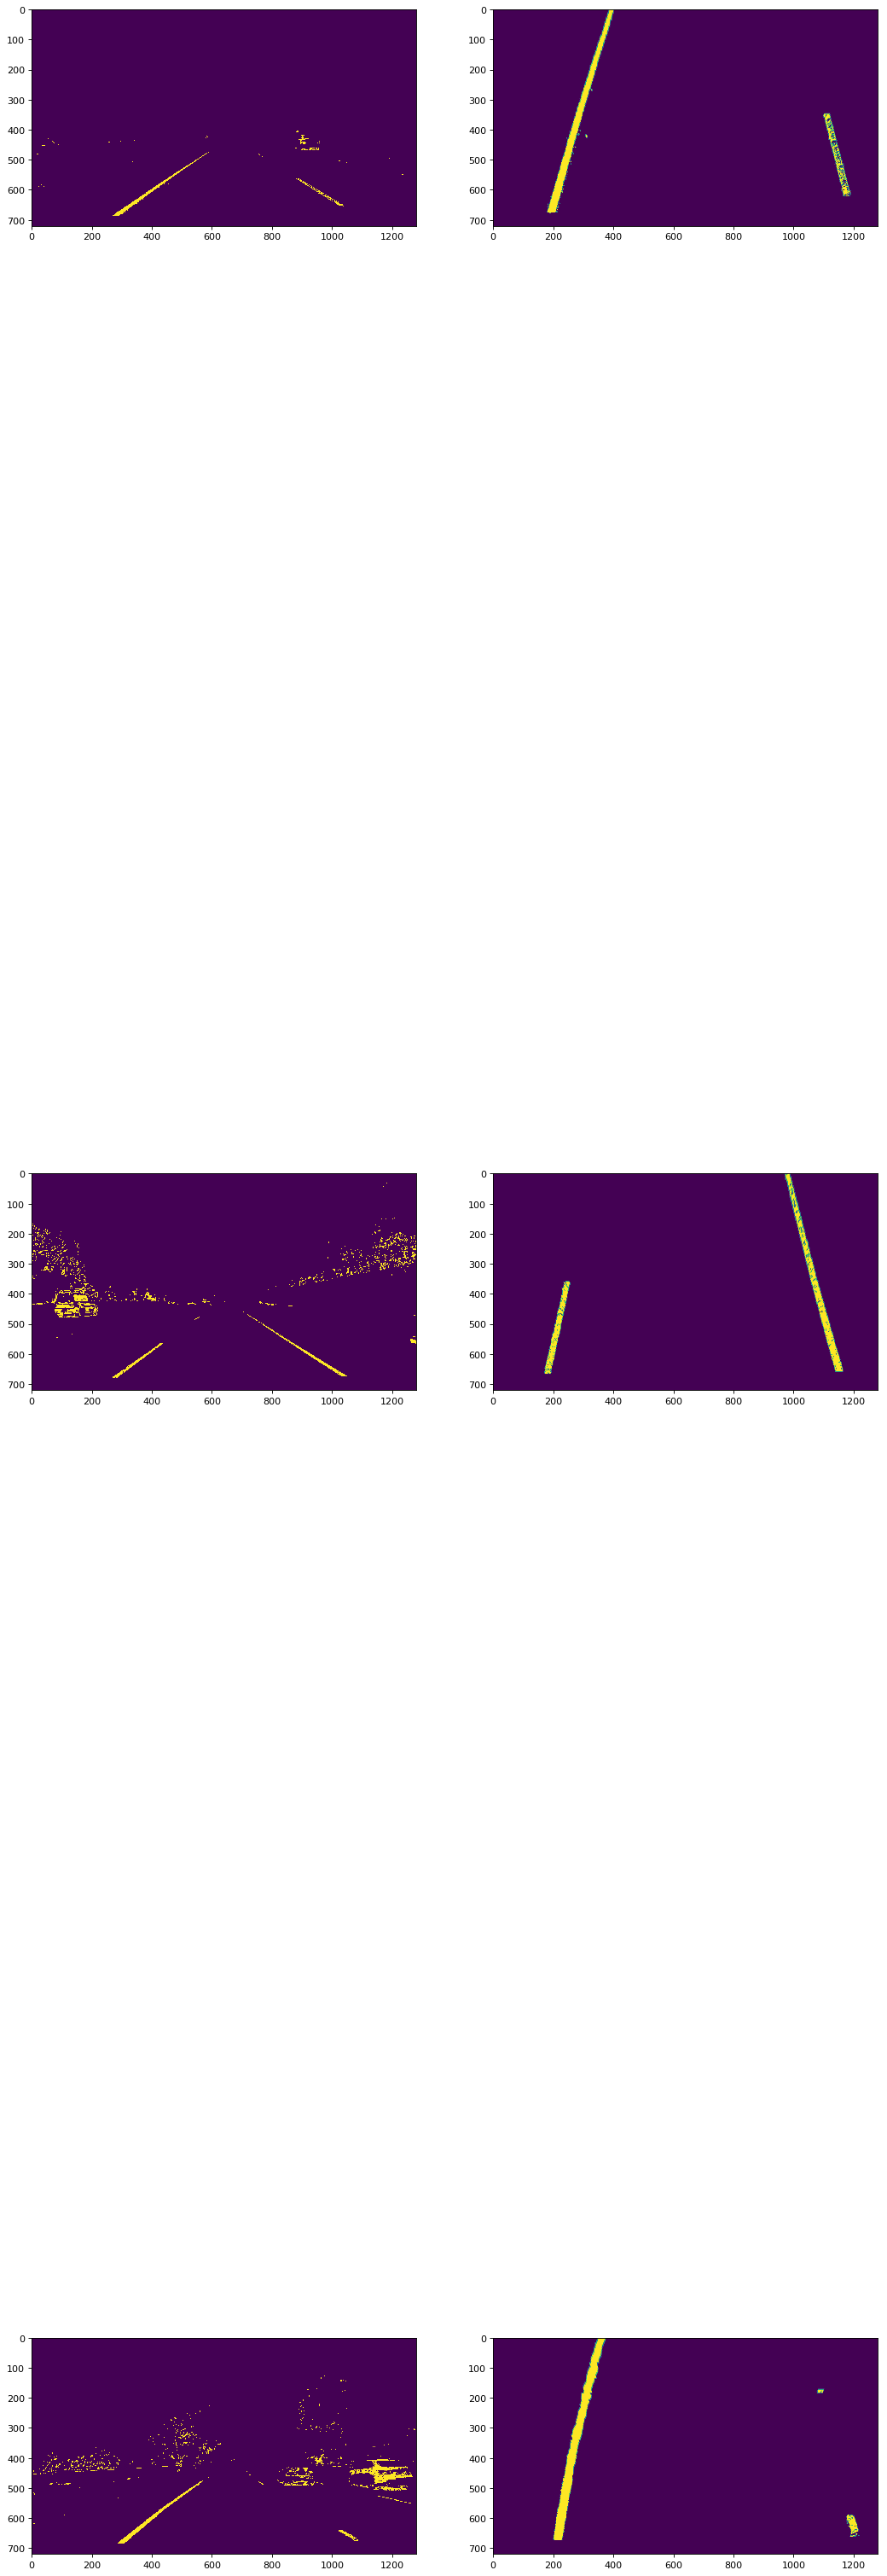

In [62]:

def make_perspective_image(img):
    # ld, lu, ru, rd
    src = np.float32([[100, 700],  [400, 500], [880, 500], [1180, 700]])
    dst = np.float32([[0, 700],  [  0,   0], [1280,  0], [1280, 700]])
    M = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(img, M, (1280, 720))
    return warped

plt.figure(figsize=(16, 64),dpi=80)
for i, path in enumerate(images):
    output_dir = "../output_images/perspective_images"
    prefix = "".join(path.split("/")[:-2])
    fname = path.split("/")[-1]
    img = binary_images[i]
    
    result_img = make_perspective_image(img)
    binary_images.append(result_img)
    
    cv2.imwrite("{}/{}".format(output_dir, fname), result_img)
    print(path)
    
    plt.subplot(len(images), 2, 2*i+ 1)
    plt.imshow(img)
    plt.subplot(len(images), 2, 2*i+2)
    plt.imshow(result_img)
    